# Análise Estatística e Modelagem Preditiva de Séries Temporais - Em Python

<h3>Aula 4 – Séries Multiplicativas, Aditivas e Decomposição de Séries Temporais</h3>

## Séries Temporais

- Uma série temporal é um conjunto sequencial de pontos de dados, medido tipicamente em tempos sucessivos.

- É matematicamente definido como um conjunto de vetores x(t), t = 0,1,2, ... onde t representa o tempo decorrido.

- A variável x(t) é tratada como uma variável aleatória.

- As medições realizadas durante um evento em uma série temporal são organizadas em uma ordem cronológica adequada.

- Uma série temporal contendo registros de uma única variável é denominada como univariada e mais de uma variável como multivariada.

## Análise Exploratória
<p> Uma análise exploratória dos dados permite compreender como os dados estão organizados.</p>

In [2]:
# Install the watermark package;
# This package is used to record versions of other packages used on this jupyter notebook.

!pip install -q -U watermark

In [65]:
# The new version of Pandas and Matplotlib bring several warning messages to the developer. Let's disable this. 

import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports for data manipulation

import pandas as pd
import numpy as np

# Imports for data visualization

import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# Imports time series analysis and modeling

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

# Formatting graph outputs

plt.style.use ('fivethirtyeight')
pd.set_option ('display.expand_frame_repr', False)
pd.set_option ('display.max_columns', 500)
pd.set_option ('display.width', 1000)
m.rcParams ['axes.labelsize'] = 14
m.rcParams ['xtick.labelsize'] = 12
m.rcParams ['ytick.labelsize'] = 12
m.rcParams ['text.color'] = 'k'


In [10]:
# Versions of package used in this jupyter notebook

%reload_ext watermark
%watermark -a "Rodolfo Data Scientist" --iversions

matplotlib      3.3.1
statsmodels.api 0.11.1
seaborn         0.10.1
pandas          1.1.1
numpy           1.18.2
Rodolfo Data Scientist


<p>Vamos carregar um dataset com uma série temporal.

O dataset é público e pode ser encontrado aqui:

https://www.kaggle.com/rakannimer/air-passengers

O conjunto de dados AirPassenger fornece totais mensais de passageiros de uma companhia aérea dos EUA, de 1949 a 1960. Esse conjunto de dados já é de uma classe de série temporal, portanto, nenhuma manipulação adicional de classe ou data é necessária.</p>


In [13]:
# Loading Data

data = pd.read_csv("https://raw.githubusercontent.com/dsacademybr/Datasets/master/dataset1.csv", header = None)

# Viewing the data

data.head()

,0,1
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Perceba que são duas colunas. Esses dados representam uma série univariada, pois temos uma variável aleatória x (número de passageiros) e a data, que representa o índice da série.

Vamos ajustar o nome de cada coluna.

In [14]:
# Adjusting the name of each columns

data.columns = ["mes","passageiros"]

In [15]:
# Viewing the data

data.head()

,mes,passageiros
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [16]:
# Statistical summary of the passenger variable. The average is 280 passengers.

data.describe()

,passageiros
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [19]:
# What will be the month with the hightest number of passengers? 
#December 1960 har 622 passengers

data.max()

mes            1960-12
passageiros        622
dtype: object

In [21]:
# We will collect the complete period of the time series

print('Início do Período de Tempo: {}\nFinal do Período de Tempo: {}'.format(data.mes.min(), data.mes.max()))

Início do Período de Tempo: 1949-01
Final do Período de Tempo: 1960-12


In [22]:
# Data Shape

data.shape

(144, 2)

In [25]:
# Data Type

data.dtypes

mes            object
passageiros     int64
dtype: object

Observe que a coluna de data está como tipo object, que é a representação de string. Teremos que ajustar isso.

In [26]:
# Object Type

type(data)

pandas.core.frame.DataFrame

## Processamento e Visualização dos Dados

Vamos converter a data do tipo object (string) para o tipo apropriado, datetime, pois assim podemos usar métodos e atributos específicos de datas.

In [30]:
# Converting the data column from object to datetime

data['mes'] = pd.to_datetime(data['mes'],format = '%Y-%m')

In [32]:
# Data Type

data.dtypes

mes            datetime64[ns]
passageiros             int64
dtype: object

In [33]:
# Viewing the data

date.head()

,mes,passageiros
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [34]:
# Let's make the date column the index on the data set. This will make our work easier late on.

data_series = data.set_index('mes')

In [35]:
# Viewing the data

data_series.head()

,passageiros
mes,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Agora sim podemos chamar esse conjunto de dados de série temporal. Vamos visualizar o índice:

In [40]:
# Viewing Index

data_series.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01', '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01', '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01', '1960-11-01', '1960-12-01'], dtype='datetime64[ns]', name='mes', length=144, freq=None)

In [41]:
# Is any null value present in the data?

data_series.isnull().sum()

passageiros    0
dtype: int64

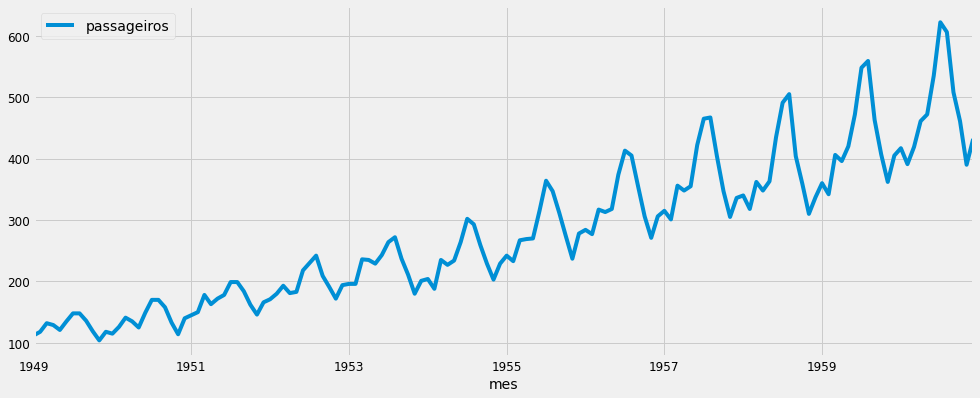

In [42]:
# Time Series Plot

data_series.plot(figsize = (15,6))
plt.show()

O gráfico acima mostra 2 componentes da série: Sazonalidade e Tendência.

- Sazonalidade - o fenômeno se repete em períodos fixos.
- Tendência - ao longo do tempo, a série segue uma tendência de crescimento.

Outro aspecto a considerar é o comportamento cíclico. Isso acontece quando o padrão de subida e descida da série não ocorre em intervalos fixos baseados em calendário. Deve-se tomar cuidado para não confundir efeito "cíclico" com efeito "sazonal".

Então, como diferenciar um padrão "cíclico" versus "sazonal"?

Se os padrões não tiverem frequências fixas baseadas em calendário, será cíclico. Porque, diferentemente da sazonalidade, os efeitos cíclicos são tipicamente influenciados pelos negócios e outros fatores socioeconômicos.

Analisar o gráfico da densidade de observações pode fornecer mais informações sobre a estrutura dos dados. Vamos criar o gráfico:

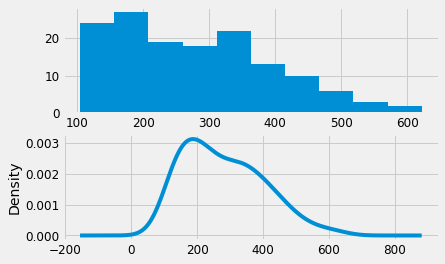

In [44]:
# Density Chart

# Plot
plt.figure(1)

#Subplot 1
plt.subplot(211)
data_series.passageiros.hist()

#subplot 2
plt.subplot(212)
data_series.passageiros.plot(kind = 'kde')
plt.show()

Análise:

- A distribuição não é perfeitamente gaussiana (distribuição normal).
- A distribuição está inclinada para a esquerda.
- As transformações podem ser úteis antes da modelagem.

Vamos agora criar Box Plots para cada ano da série.

<AxesSubplot:xlabel='mes', ylabel='passageiros'>

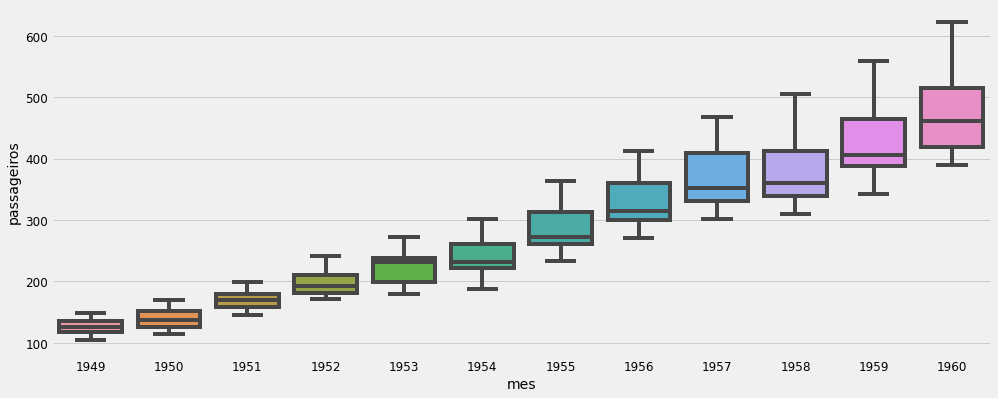

In [50]:
# Defines the plot area for the subplot (the boxplots)

fig, ax = plt.subplots(figsize = (15,6))

# Create a box plot for each year using Seaborn
# Note that we are extracting the year from the series index

sns.boxplot(data_series.passageiros.index.year,data_series.passageiros,ax=ax)

Análise:

- Valores medianos ao longo dos anos confirmam uma tendência ascendente.
- Aumento constante da dispersão do meio (mediana) dos dados ao longo do tempo. As caixas vão se tornando cada vez maiores.
- Um modelo considerando a sazonalidade pode funcionar bem para prever esta série.

In [51]:
data_series.head()

,passageiros
mes,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Como é uma série temporal mensal e segue um determinado padrão repetitivo todos os anos, você pode plotar cada ano como uma linha separada no mesmo gráfico. Isso permite comparar os padrões do ano lado a lado.

Vamos fazer isso? Então execute a célula abaixo.

Observe que estou usando agora o dataset "dados" e não "dados_serie". Por que? Porque precisamos da data como uma coluna e não como índice, para criar o gráfico abaixo.

In [53]:
# Prepare the data

x = data['mes'].values
y1 = data['passageiros'].values

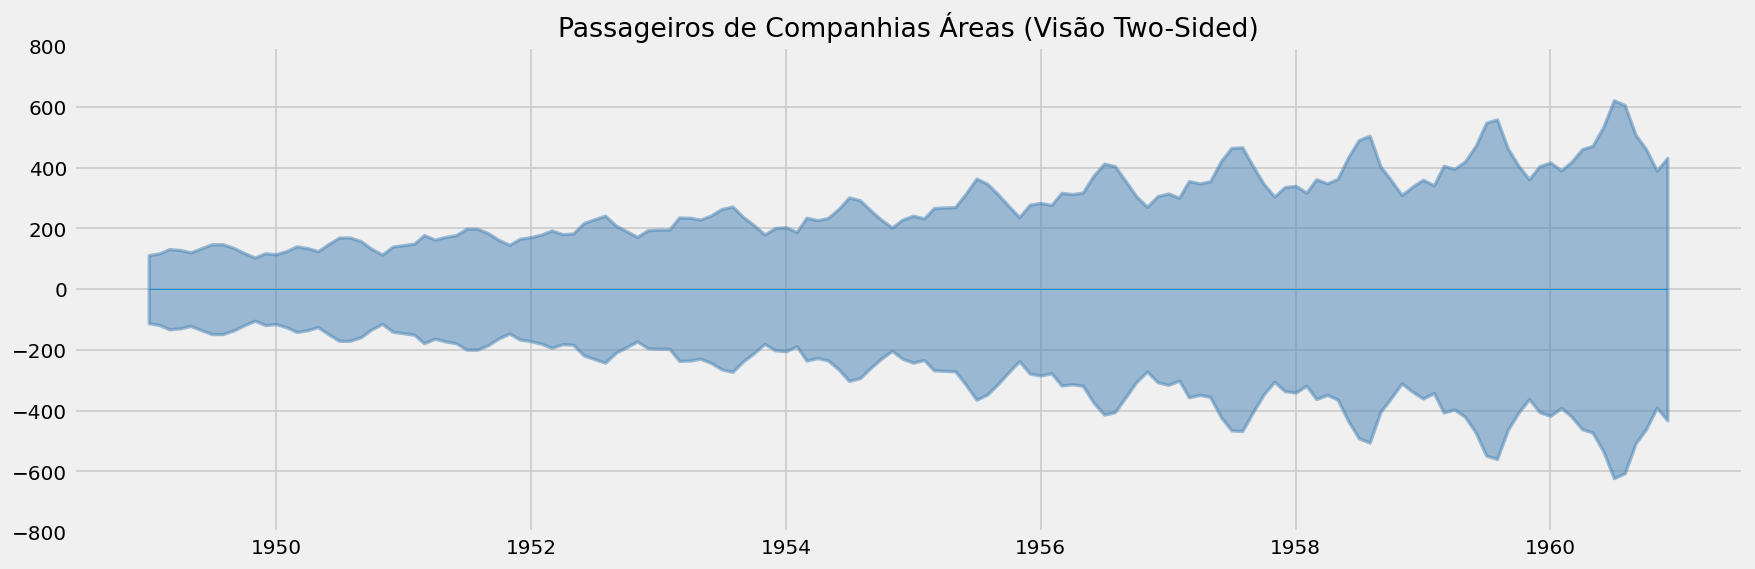

In [55]:
# Plot

# Plot area
fig, ax = plt.subplots(1,1, figsize = (16,5), dpi = 120)

# Fill the chart
plt.fill_between(x, y1 = y1, y2 = -y1, alpha = 0.5, linewidth = 2, color = 'steelblue')

# Y - axis limits
plt.ylim(-800,800)

# Title
plt.title("Passageiros de Companhias Áreas (Visão Two-Sided)", fontsize=16)

# Line limit
plt.hlines(y=0, xmin = np.min(data.mes), xmax = np.max(data.mes), linewidth = .5)

#Shows the graph
plt.show()

           


## Séries Temporais Aditivas e Multiplicativas
Dependendo da natureza da tendência e da sazonalidade, uma série temporal pode ser modelada como aditiva ou multiplicativa, em que cada observação na série pode ser expressa como uma soma ou um produto dos componentes:

- Séries temporais aditivas: Valor = Nível Base + Tendência + Sazonalidade + Erro
- Séries temporais multiplicativas: Valor = Nível Base x Tendência x Sazonalidade x Erro

## Descomposição da Série Temporal

- Podemos usar os modelos estatísticos para realizar uma decomposição dessa série cronológica.
- A decomposição de séries temporais é uma tarefa estatística que desconstrói uma série temporal em vários componentes, cada um representando uma das categorias de padrões.
- Com os modelos de estatísticas, poderemos ver a tendência, os componentes sazonais e residuais de nossos dados.

Você pode fazer uma decomposição clássica de uma série temporal, considerando a série como uma combinação aditiva ou multiplicativa do nível base, tendência, índice sazonal e residual.

A função seasonal_decompose do pacote Statsmodels em Python implementa isso convenientemente. Aqui o site do Statsmodels com bastante documentação: https://www.statsmodels.org/

Vamos então decompor nossa série temporal.

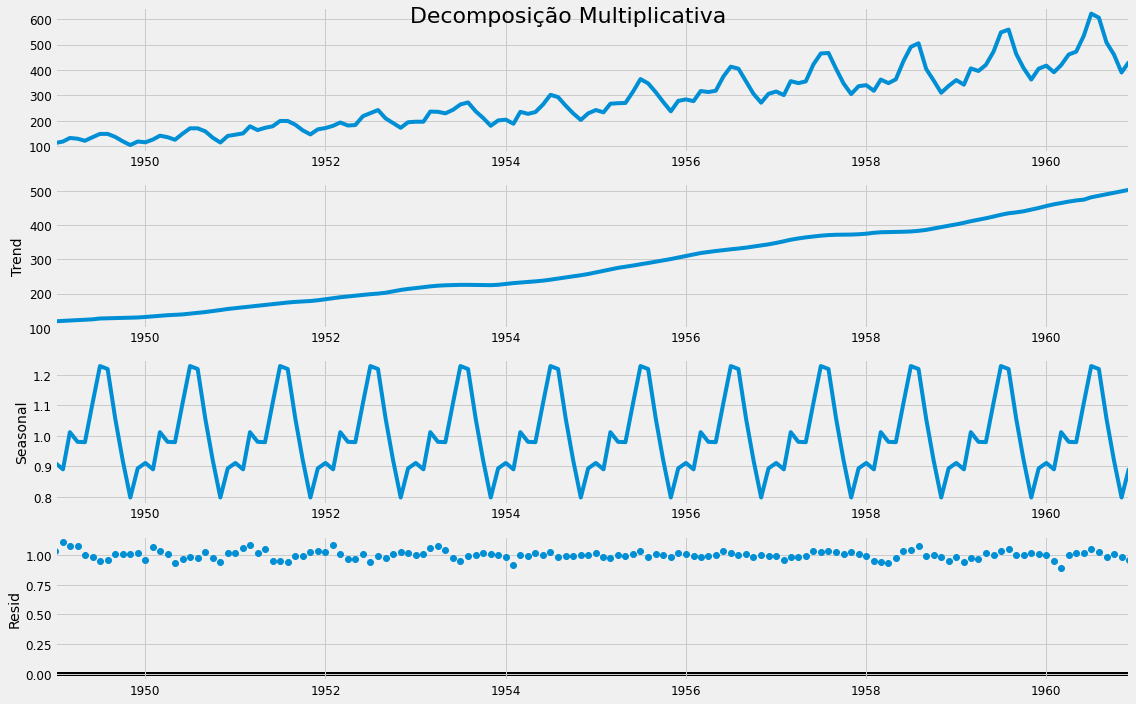

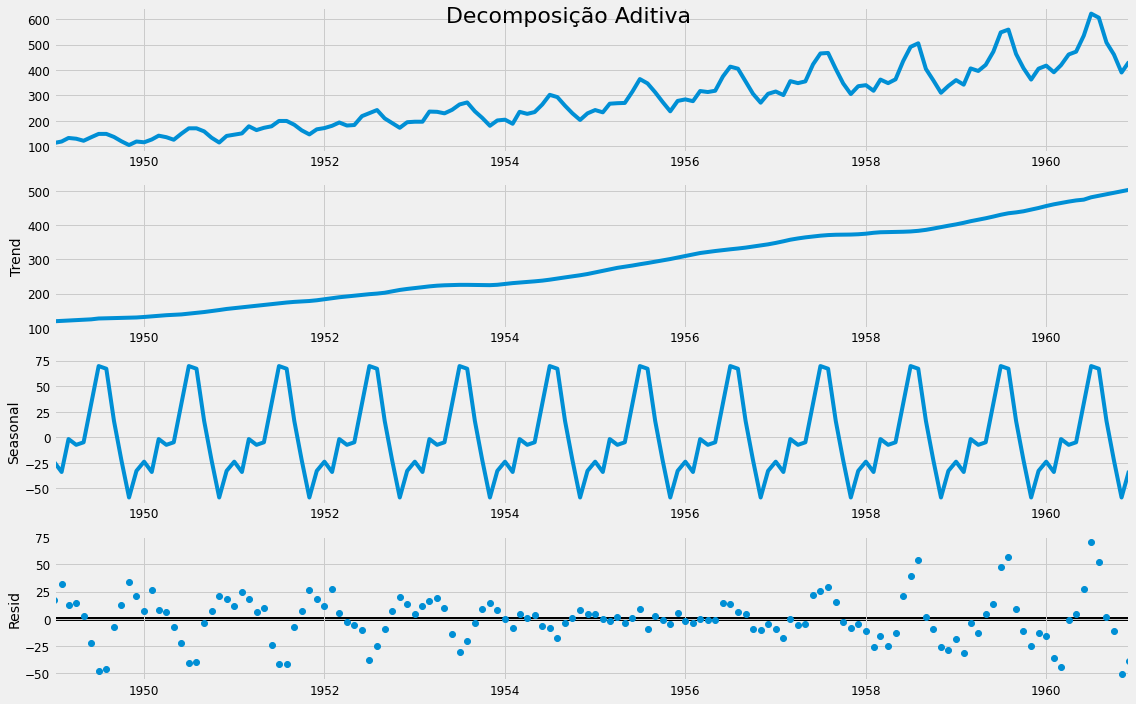

In [75]:
# Mutiplicative Decomposition 

decomposicao_multiplicativa = sm.tsa.seasonal_decompose(data_series, model = 'multiplicative', extrapolate_trend = 'freq')

# Additive Decomposition
decomposicao_aditiva = sm.tsa.seasonal_decompose(data_series, model = "aditive", extrapolate_trend = 'freq')

# Plot

plt.rcParams.update({'figure.figsize': (16,10)})
decomposicao_multiplicativa.plot().suptitle('Decomposição Multiplicativa', fontsize = 22)
decomposicao_aditiva.plot().suptitle('Decomposição Aditiva', fontsize = 22)
plt.show()


No gráfico acima podemos ver os componentes da série temporal:

1- A primeira linha do gráfico mostra os dados observados, em nosso exemplo o número de passageiros.

2- A segunda linha mostra a tendência do gráfico, que claramente é uma tendência de crescimento, ou seja, o númeto de passageiros tende a crescer ao longo do tempo.

3- A terceira linha mostra a sazonalidade. Claramente temos períodos regulares de aumento e queda, momentos em que temos mais passageiros e momentos com menos passageiros nas viagens aéreas. Isso talvez possa ser explicado pelo aumento das viagens no período de férias, o que se repete ano após ano.

4- A quarta linha é o componete irregular ou resíduo.

Definir extrapolate_trend = 'freq' cuida de todos os valores ausentes na tendência e nos resíduos no início da série (se existirem, claro).

Se você observar atentamente os resíduos da decomposição aditiva, ela permanece com algum padrão. A decomposição multiplicativa, no entanto, parece bastante aleatória, o que é bom. Então, idealmente, a decomposição multiplicativa deve ser preferida para essa série específica.

A saída numérica da tendência, os componentes sazonais e residuais são armazenados na própria saída decomposicao_multiplicativa. Vamos extraí-los e colocá-los em uma tabela de dados.

In [77]:
# object Type

type(decomposicao_multiplicativa)

statsmodels.tsa.seasonal.DecomposeResult

In [78]:
# Extract the components
# Actual values = Product of (seasonal * trend * residue)

# Concatenates the result of the series decomposition

data_serie_reconstruida = pd.concat([decomposicao_multiplicativa.seasonal, 
                                      decomposicao_multiplicativa.trend, 
                                      decomposicao_multiplicativa.resid, 
                                      decomposicao_multiplicativa.observed], axis = 1)

# Difines trhe names of the columns 
data_serie_reconstruida.columns = ['Sazonalidade', 'Tendência', 'Resíduos', 'Valores_Observados']

# Shows the result
data_serie_reconstruida.head ()

,Sazonalidade,Tendência,Resíduos,Valores_Observados
mes,,,,
1949-01-01,0.911256,118.588481,1.036418,112.0
1949-02-01,0.890342,119.734169,1.106896,118.0
1949-03-01,1.012397,120.879856,1.078621,132.0
1949-04-01,0.980719,122.025544,1.077940,129.0
1949-05-01,0.979495,123.171232,1.002938,121.0


Se você checar, o produto das colunas Sazonalidade, Tendência e Resíduos deve ser exatamente igual a Valores_Observados.

Por exemplo:

Série na data 1949-01-01 = 112.0
Série na data 1949-01-01 = Sazonalidade x Tendência x Resíduos = 0.911256 x 118.588481 x 1.036418 = 112.0

In [79]:
# Calculation in Python

valor_observado = 0.911256 * 118.588481 * 1.036418
print(valor_observado)

111.9999565227569


Ou seja, isso comprova como uma série temporal é na verdade o conjunto de componentes que podem ser extraídos, transformados, analisados e usados para fazer previsões.